Sources:
- https://www.linkedin.com/feed/update/urn:li:activity:6947565185431728131?utm_source=linkedin_share&utm_medium=member_desktop_web
- https://www.kaggle.com/datasets/preetviradiya/brian-tumor-dataset?resource=download
- https://machinelearningmastery.com/how-to-save-a-numpy-array-to-file-for-machine-learning/

# Import packages

In [2]:
# general
import argparse
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

# Check the data
The original data was downloaded from Kaggle:
- https://www.kaggle.com/datasets/preetviradiya/brian-tumor-dataset?resource=download

In [3]:
path = "data/Brain Tumor Data Set"
print(os.listdir(path))

image_paths_positive = list(os.listdir(path+"/Brain Tumor"))
image_paths_positive = [path+"/Brain Tumor/"+i for i in image_paths_positive]
print("Positive:", len(image_paths_positive))

image_paths_negative = list(os.listdir(path+"/Healthy"))
print("Negative:", len(image_paths_negative))
image_paths_negative = [path+"/Healthy/"+i for i in image_paths_negative]

['Brain Tumor', 'Healthy']
Positive: 2487
Negative: 2087


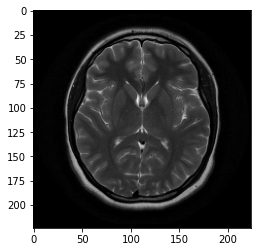

In [4]:
def process_image(image_path, dims=(224,224)):
    # load image
    image = cv2.imread(image_path)
    # re-scale
    image = cv2.resize(image, dims)
    return image

plt.imshow(process_image(image_paths_negative[0]))
plt.show()

# Create a dataset
## Read the data

In [5]:
# create list vector
images = [process_image(image_path) for image_path in image_paths_positive + image_paths_negative]
labels = [1 for image_path in image_paths_positive] + [0 for image_path in image_paths_negative]

print(len(images))
print(len(labels))
print("ok - list vectors")

4574
4574
ok - list vectors


In [6]:
# create numpy arrays
images = np.array(images) / 255.0
labels = np.array(labels)

print("ok - numpy arrays")

ok - numpy arrays


## Save the dataset

In [7]:
np.savez_compressed('images.npz', images)

In [9]:
np.savez_compressed('labels.npz', labels)